# Compare Models ARIMA vs LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# add the path to the src directory
import sys
sys.path.append('../src')

In [2]:
# Import both pipelines
from models.arima_tsla import run_arima_pipeline
from models.lstm_tsla import run_lstm_pipeline

# ARIMA

[*********************100%***********************]  1 of 1 completed


Train: 2015-07-01 - 2023-12-29 (2140)
Test:  2024-01-02 - 2025-07-30 (395)
Searching best ARIMA parameters (p,d,q)...
Best order: (3, 1, 2) with AIC=13613.09

Fitting ARIMA(3, 1, 2) on training set...
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2140
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -6800.544
Date:                Mon, 11 Aug 2025   AIC                          13613.088
Time:                        00:35:17   BIC                          13647.096
Sample:                             0   HQIC                         13625.533
                               - 2140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

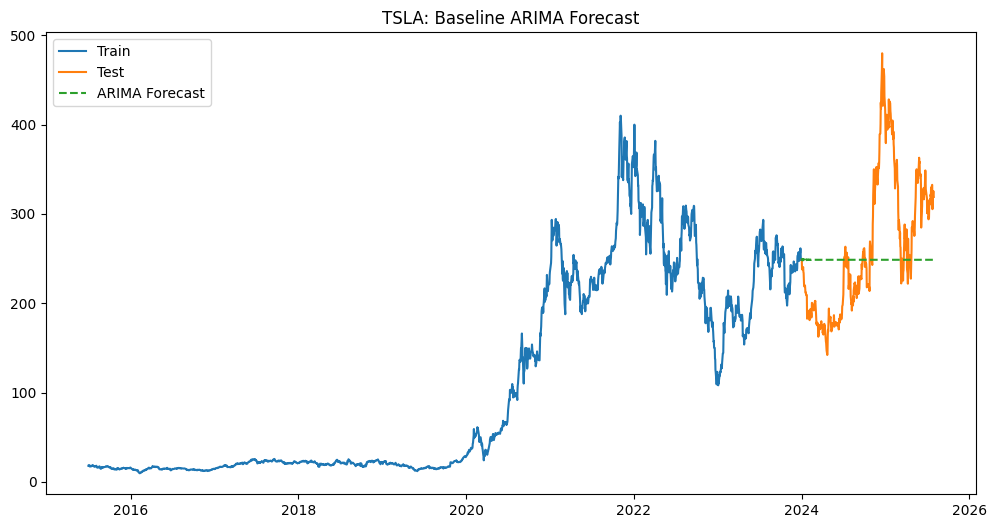

Saved baseline ARIMA model to ../models/arima_tsla.joblib

Running rolling ARIMA forecast...

Rolling Forecast Evaluation:
MAE: 28.2755
RMSE: 38.3412
MAPE: 10.93%


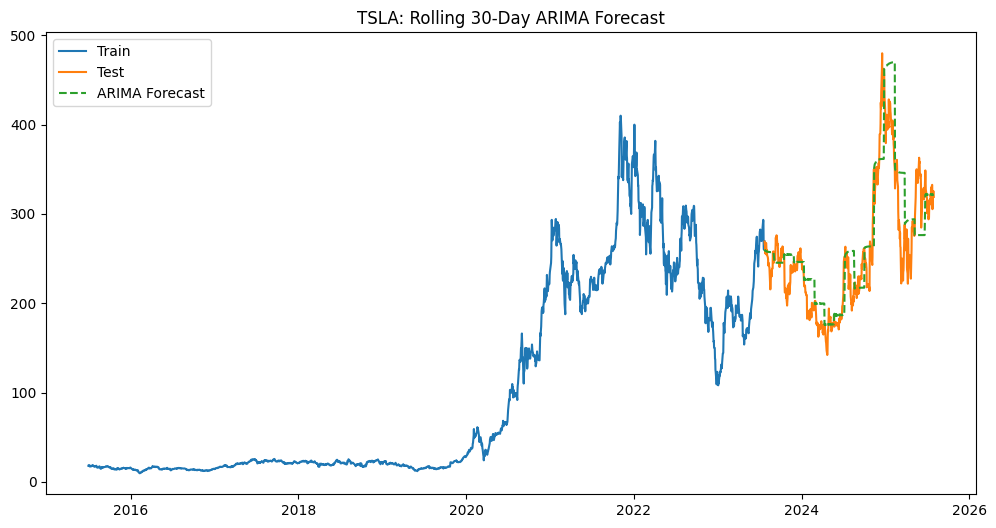

In [4]:
# --- 1. Run ARIMA ---
arima_res = run_arima_pipeline(
    processed_csv="../data/processed/tsla.csv",
    model_out="../models/arima_tsla.joblib",
    plot_out="../reports/arima_tsla_forecast.png",
    train_end="2023-12-31"
)

# LSTM

[*********************100%***********************]  1 of 1 completed


Train: 2015-07-01 - 2023-12-29 (2140)
Test:  2024-01-02 - 2025-07-30 (395)
X_train shape: (2080, 60, 1), X_test shape: (395, 60, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - loss: 0.0211 - val_loss: 0.0023
Epoch 2/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 3/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 4/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 0.0015 - val_loss: 9.9163e-04
Epoch 11/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 12/80
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms

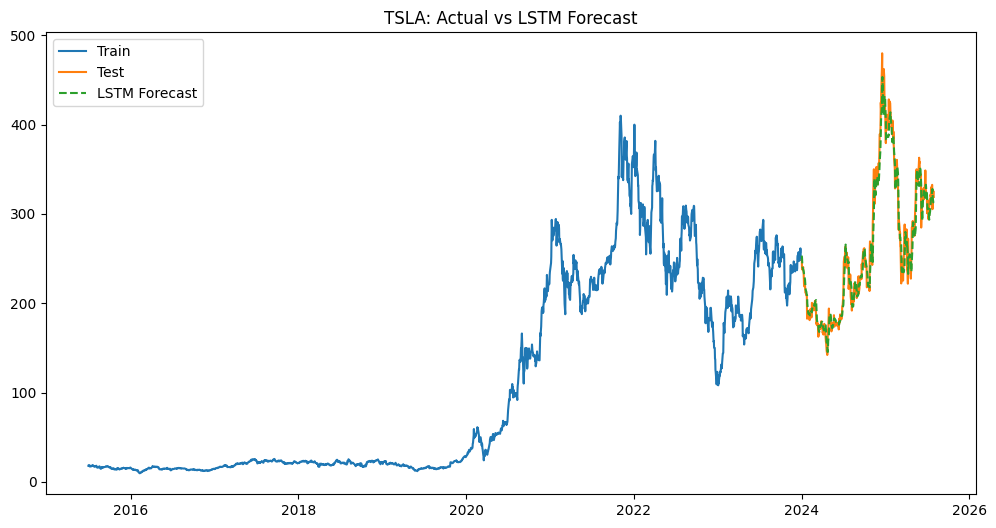

Saved LSTM model to models/lstm_tsla.h5 and scaler to models/lstm_scaler.gz


In [3]:
# --- 2. Run LSTM ---
lstm_res = run_lstm_pipeline(
    processed_csv="../data/processed/tsla.csv",
    model_out="models/lstm_tsla.h5",
    scaler_out="models/lstm_scaler.gz",
    plot_out="reports/lstm_tsla_forecast.png",
    lookback=60,
    epochs=80,
    batch_size=32,
    train_end="2023-12-31"
)

# Metrics

In [6]:
# --- 3. Create metrics comparison ---
metrics_df = pd.DataFrame({
    "ARIMA": arima_res["baseline"]["metrics"],
    "LSTM": lstm_res["metrics"]
}).T

print("\n=== Model Performance Comparison ===")
print(metrics_df)


=== Model Performance Comparison ===
             MAE       RMSE       MAPE
ARIMA  62.977551  77.938466  24.105019
LSTM   10.400074  14.620097   3.885322


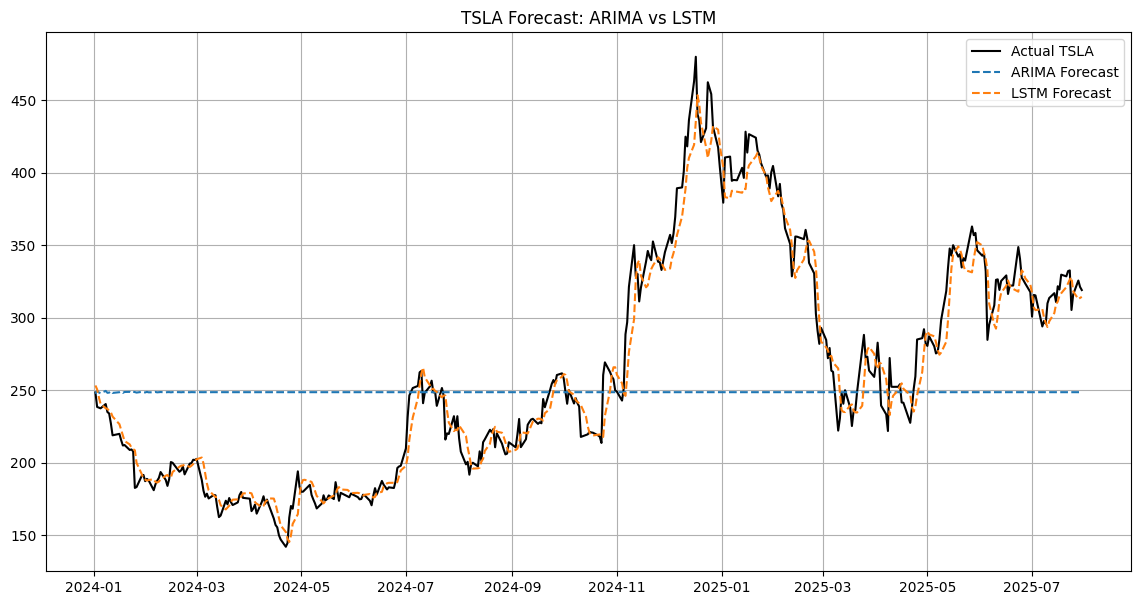

In [8]:
# --- 4. Combined Plot ---
import os
plt.figure(figsize=(14,7))
plt.plot(lstm_res["y_true"].index, lstm_res["y_true"].values, label="Actual TSLA", color="black")
plt.plot(arima_res["baseline"]["forecast"].index, arima_res["baseline"]["forecast"].values, label="ARIMA Forecast", linestyle="--")
plt.plot(lstm_res["y_pred"].index, lstm_res["y_pred"].values, label="LSTM Forecast", linestyle="--")
plt.title("TSLA Forecast: ARIMA vs LSTM")
plt.legend()
plt.grid(True)
os.makedirs("reports", exist_ok=True)
plt.savefig("reports/arima_vs_lstm.png", dpi=150, bbox_inches="tight")
plt.show()

In [9]:

# --- 5. Save metrics table ---
metrics_df.to_csv("../reports/model_comparison_metrics.csv")
print("Saved comparison plot and metrics table to reports/")

Saved comparison plot and metrics table to reports/


## Summary;

**metrics comparison**, and it’s pretty clear that LSTM model is performing much better than the ARIMA one across all three metrics.